# 광역시별 관광객 추이

코로나19의 확산과 사태의 장기화와 세계 각국의 국경 폐쇄 및 입국제한정책 (Ministry of Foreign Affairs, 2021)으로 이전과 같은 자유로운 해외여행이 어려워지며 대체재로써 국내 여행을 계획하는 사람들이 늘어나는 모습을 보였다(Consumer Insight, 2020). 이러한 2019 ~ 2021 국내 관광형태 변화를 이동 통신 데이터를 이용해 지역별 방문자 수 추이를 통해 분석함. 방문자는 일상생활권(거주, 통근, 통학 등)을 벗어나 관광 등의 목적으로 한 장소(분석 대상 공간)에 일정시간(30분)이상 체류한 사람으로 정의함.

[데이터셋 변수 설명] 
- 기준년월 = 일자 데이터 (e.g. 2019 = 2019년)
- 광역지자체 = 광역지자체명
- 방문자 구분 = 광역지자체명 기준으로 방문자 구분
    1. 현지인 방문자(a) : 기초지자체 기준, 해당 광역/ 기초지자체에 속한 행정동 상주민 중 본인이 상주하고있는 행정동 이외 행정동 방문자.
    2. 외지인방문자(b) : 기초지자체 기준 해당 지자체(분석대상 공간)에 상주(거주/통학/통근 등)하고 있지 않은 사람
    3. 외국인방문자(c) : 본인 국가에서 구매한 USIM을 제거 하지 않은 외국인이 한국에서 통신사(KT)와 신호를 주고받는 서비스를 사용하는 사람
- 방문자 수 = 해당 년도에 광역지자체에 방문객 수
- 전년도 방문자 수 = 전년도에 광역지자체에 방문객 수

[전처리 과정 설명] 
우리나라 대표하는 광역시와 대표 관광지인 제주특별자치도의 관광객 수의 변화량 계산  
- 방문자 구분 == 외지인 방문자(b) & 기준년월 != 2019
- 조건 색인 이후 불필요한 열인 '방문자 구분' drop
- ('방문자 수' - '전년도 방문자 수') / '전년도 방문자 수 * 100 계산해서 변화량 열 생성
- 2020, 2021 각 각의 변화량 열을 합쳐 새로운 데이터프레임 생성
- 새로운 데이터 프레임 시각화


[기타 데이터 관련 설명] 
- 외국인 방문자는 통신사간의 협약에 의해 넘어오는 통신사 기준 시그널 데이터로 국가 추정하며, 외국인은 한국 단기체류자에 한함(과거 60일 기준, 15일 이하 체류자)


source : 한국관광 데이터랩 - 빅데이터 - 이동통신 - 지역별 방문자수 (방문자 수 추이)
https://datalab.visitkorea.or.kr/datalab/portal/bda/getMetcoAna.do#

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager,rc

In [2]:
# glogb() 이용해서 폴더 안에 있는 모든 csv 파일을 하나의 데이터프레임으로 불러오기
file_names = glob("../Dataset/raw_data/visitor/*.csv") 
visitor = pd.DataFrame() 

for file_name in file_names:
    temp = pd.read_csv(file_name, encoding='cp949') 
    visitor = pd.concat([visitor, temp])


visitor.head()

,기준년월,광역지자체,방문자 구분,방문자 수,전년도 방문자 수
0,2019,강원도,현지인방문자(a),292021044.0,299117161.0
1,2019,강원도,외지인방문자(b),143757912.0,133465633.0
2,2019,강원도,외국인방문자(c),1854111.0,1754100.0
3,2019,강원도,외부방문자(b+c),145612023.0,135219733.0
4,2019,강원도,전체방문자(a+b+c),437633067.0,434336894.0


In [3]:
# 필요한 행만 조건 색인
visitor = visitor[(visitor['방문자 구분'] == '외지인방문자(b)') & (visitor['기준년월'] != 2019)]
visitor = visitor.drop(columns = '방문자 구분', axis = 1)

visitor

,기준년월,광역지자체,방문자 수,전년도 방문자 수
6,2020,강원도,131065291.0,143757912.0
11,2021,강원도,130221676.0,131065291.0
6,2020,경기도,548938292.0,655389497.0
11,2021,경기도,550778084.0,548938292.0
6,2020,경상남도,139194072.0,151265289.0
11,2021,경상남도,140211858.0,139194072.0
6,2020,경상북도,152541333.0,172036882.0
11,2021,경상북도,161251041.0,152541333.0
6,2020,광주광역시,56610108.0,65535267.0
11,2021,광주광역시,56231056.0,56610108.0


In [4]:
# 새로운 '변화량' 열에 변화량 계산 
visitor['변화량'] = ((visitor['방문자 수'] - visitor['전년도 방문자 수']) / visitor['전년도 방문자 수']) * 100
# 자료형 변경 
visitor = visitor.astype({'방문자 수':'int'})
visitor = visitor.astype({'전년도 방문자 수':'int'})
visitor = visitor.astype({'변화량':'float'})
pd.options.display.float_format = '{:,.2f}'.format
# 필요한 지역만 조건색인
visitor = visitor[(visitor['광역지자체'] == '서울특별시') | (visitor['광역지자체'] == '인천광역시') | (visitor['광역지자체'] == '대구광역시') |\
    (visitor['광역지자체'] == '부산광역시') | (visitor['광역지자체'] == '대전광역시') | (visitor['광역지자체'] == '울산광역시') |\
        (visitor['광역지자체'] == '광주광역시') | (visitor['광역지자체'] == '제주특별자치도')]


visitor

,기준년월,광역지자체,방문자 수,전년도 방문자 수,변화량
6,2020,광주광역시,56610108,65535267,-13.62
11,2021,광주광역시,56231056,56610108,-0.67
6,2020,대구광역시,86201112,106502840,-19.06
11,2021,대구광역시,87651389,86201112,1.68
6,2020,대전광역시,69473159,83144173,-16.44
11,2021,대전광역시,69111136,69473159,-0.52
6,2020,부산광역시,124725884,149672134,-16.67
11,2021,부산광역시,123660862,124725884,-0.85
6,2020,서울특별시,483312564,648561588,-25.48
11,2021,서울특별시,485882474,483312564,0.53


In [5]:
# 2020년 데이터 프레임 따로 생성
visitor_2020 = visitor[(visitor['기준년월'] == 2020)]
visitor_2020 = visitor_2020[(visitor_2020['광역지자체'] == '서울특별시') | (visitor_2020['광역지자체'] == '인천광역시') | (visitor_2020['광역지자체'] == '대구광역시') |\
    (visitor_2020['광역지자체'] == '부산광역시') | (visitor_2020['광역지자체'] == '대전광역시') | (visitor_2020['광역지자체'] == '울산광역시') |\
        (visitor_2020['광역지자체'] == '광주광역시') | (visitor_2020['광역지자체'] == '제주특별자치도')]
visitor_2020 = visitor_2020.rename(columns = {'변화량':'2020 변화량'})
visitor_2020 = visitor_2020.drop(columns = '기준년월', axis = 1)
visitor_2020 = visitor_2020.reset_index(drop=False)
visitor_2020 = visitor_2020.drop(columns = 'index', axis = 1)

visitor_2020

,광역지자체,방문자 수,전년도 방문자 수,2020 변화량
0,광주광역시,56610108,65535267,-13.62
1,대구광역시,86201112,106502840,-19.06
2,대전광역시,69473159,83144173,-16.44
3,부산광역시,124725884,149672134,-16.67
4,서울특별시,483312564,648561588,-25.48
5,울산광역시,43244282,47793760,-9.52
6,인천광역시,135966530,177054619,-23.21
7,제주특별자치도,46183160,52895899,-12.69


In [6]:
# 2021년 데이터 프레임 따로 생성
visitor_2021 = visitor[(visitor['기준년월'] == 2021)]
visitor_2021 = visitor_2021[(visitor_2021['광역지자체'] == '서울특별시') | (visitor_2021['광역지자체'] == '인천광역시') | (visitor_2021['광역지자체'] == '대구광역시') |\
    (visitor_2021['광역지자체'] == '부산광역시') | (visitor_2021['광역지자체'] == '대전광역시') | (visitor_2021['광역지자체'] == '울산광역시') |\
        (visitor_2021['광역지자체'] == '광주광역시') | (visitor_2021['광역지자체'] == '제주특별자치도')]
visitor_2021 = visitor_2021.rename(columns = {'변화량':'2021 변화량'})
visitor_2021 = visitor_2021.drop(columns = '기준년월', axis = 1)
visitor_2021 = visitor_2021.reset_index(drop=False)
visitor_2021 = visitor_2021.drop(columns = 'index', axis = 1)

visitor_2021

,광역지자체,방문자 수,전년도 방문자 수,2021 변화량
0,광주광역시,56231056,56610108,-0.67
1,대구광역시,87651389,86201112,1.68
2,대전광역시,69111136,69473159,-0.52
3,부산광역시,123660862,124725884,-0.85
4,서울특별시,485882474,483312564,0.53
5,울산광역시,42680078,43244282,-1.30
6,인천광역시,135519552,135966530,-0.33
7,제주특별자치도,59284068,46183160,28.37


In [7]:
# 2020, 2021 변화량 열로 이루어진 최종 데이터프레임 완성
visitor_v = pd.concat([visitor_2020, visitor_2021[['2021 변화량']]],axis=1)
visitor_v = visitor_v.drop(columns = '방문자 수', axis = 1)
visitor_v = visitor_v.drop(columns = '전년도 방문자 수', axis = 1)

visitor_v

,광역지자체,2020 변화량,2021 변화량
0,광주광역시,-13.62,-0.67
1,대구광역시,-19.06,1.68
2,대전광역시,-16.44,-0.52
3,부산광역시,-16.67,-0.85
4,서울특별시,-25.48,0.53
5,울산광역시,-9.52,-1.30
6,인천광역시,-23.21,-0.33
7,제주특별자치도,-12.69,28.37


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


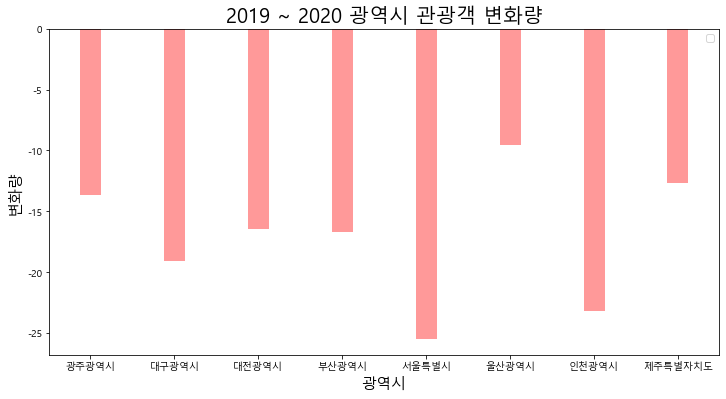

In [8]:
# 2019 ~ 2020 관광객 변화량 시각화
plt.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(8)

b1 = plt.bar(visitor_v['광역지자체'], visitor_v['2020 변화량'], bar_width, alpha=0.4, color='red')

# x축, y축 이름 및 범례 설정
plt.title('2019 ~ 2020 광역시 관광객 변화량',fontsize= 20)
plt.xlabel('광역시', size = 15)
plt.ylabel('변화량', size = 15)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


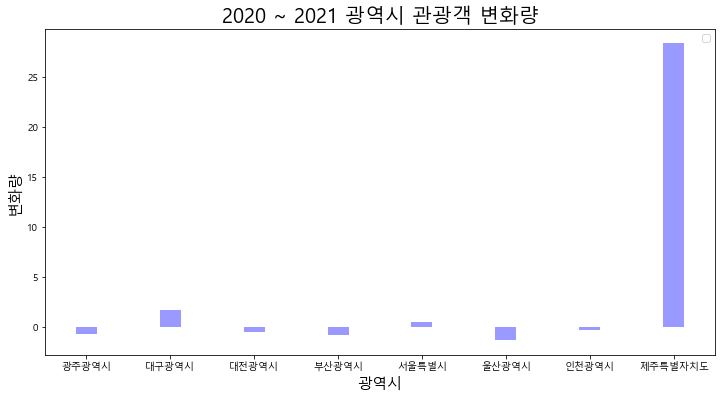

In [9]:
# 2020 ~ 2021 관광객 변화량 시각화
plt.rc('font', family = 'Malgun Gothic')

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(8)

b2 = plt.bar(visitor_v['광역지자체'], visitor_v['2021 변화량'], bar_width, alpha=0.4, color='blue')

# x축, y축 이름 및 범례 설정
plt.title('2020 ~ 2021 광역시 관광객 변화량',fontsize= 20)
plt.xlabel('광역시', size = 15)
plt.ylabel('변화량', size = 15)
plt.legend()
plt.show()